## David So - Math478-001 Take-Home Final, 16 December 2025

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
0,11.93000,10,4,15.5,0,11.1,31,3.6,39.8,45,3,366,9,2.95,247.79,3
1,11.75333,21,7,15.4,0,13.8,23,3.9,44.8,1,3,711,8,1.99,184.94,11
2,10.90857,11,14,15.8,3,11.4,22,3.8,18.1,2,3,434,10,4.94,574.19,4
3,9.35000,21,5,16.4,2,15.4,29,3.4,38.6,0,2,995,6,0.80,62.41,8
4,8.98000,19,13,16.1,1,12.8,17,3.6,36.3,0,3,617,7,1.86,129.14,2


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
0,23,3,15.9,0,13.5,17,3.7,29.1,1,2,862,8,3.17,230.47,11
1,5,13,15.4,3,9.9,27,3.4,31.4,1,3,734,9,5.08,581.30,4
2,12,5,15.7,3,9.4,22,3.7,48.4,21,2,484,7,4.36,448.85,1
3,12,14,16.4,2,12.1,24,3.8,30.7,1,3,621,7,2.59,250.39,5
4,19,2,15.7,0,11.2,22,3.8,35.8,4,3,621,8,6.68,666.12,13


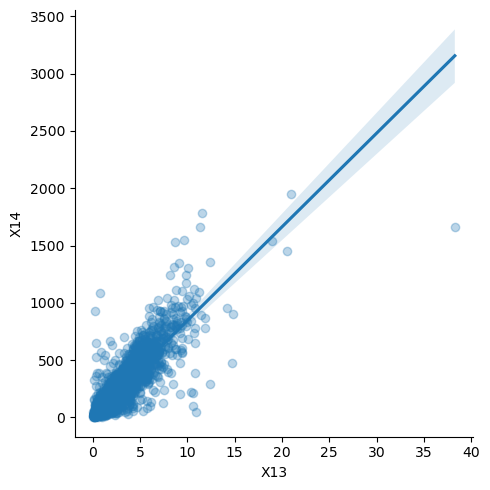

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.pipeline import Pipeline
train = pd.read_csv("Data_train.csv")
test = pd.read_csv("Data_testX.csv")
display(train.head())
display(test.head())
sns.lmplot(x = "X13", y = "X14", data = test, scatter_kws = {'alpha':0.3})

In [2]:
y = train["Y"]
X = train.drop(columns=["Y"])

# 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RidgeCV Model Selection
model = Pipeline([("scaler", MinMaxScaler()), ("ridge", RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=kf))])
scores = cross_val_score(estimator=model, X=X, y=y, cv=kf, scoring="neg_mean_squared_error")
print("Est. RMSE:", np.sqrt(-scores).min())
model.fit(X, y)
model.named_steps["ridge"].alpha_

Est. RMSE: 1.264182273701956


np.float64(10.0)

In [3]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("ridge", Ridge(alpha=10))])
pipe.fit(X,y)

Pipeline(steps=[('scaler', MinMaxScaler()), ('ridge', Ridge(alpha=10))])

In [4]:
X_test = test
y_test_pred = pipe.predict(X_test)
pd.DataFrame(y_test_pred).to_csv(
    "So_David_Predictions.csv",
    index=False,
    header=False
)